# K-Fold Mutual Information Estimation

The `torch_mist` package provides basic utilities for estimating value of mutual information using k-fold cross validation.
The considered dataset is split into `K` folds, then `K-2` folds are used to train the mutual information estimation, one fold is used to determine when to stop the training and the last is used to evaluate the value of mutual information. 

This procedure is repeated `K` times (with different train/validation/test splits) to increase the reliability of the estimates.

In [1]:
from torch_mist import k_fold_mi_estimate
from sklearn.datasets import load_iris

# Load the Iris Dataset as a pandas DataFrame
iris_dataset = load_iris(as_frame=True)['data']

# Create np.arrays corresponding to petal and sepal size
petal = iris_dataset[['petal length (cm)', 'petal width (cm)']].values
sepal = iris_dataset[['sepal length (cm)', 'sepal width (cm)']].values

# Estimate how much information the petal size and the target specie have in common
estimated_mi, log = k_fold_mi_estimate(
    data=(petal, sepal),          
    estimator_name='smile',     # Use the Smile mutual information estimator
    folds=5,                    # Number of folds for cross-validation
    neg_samples=8,               # Number of negative samples
    verbose=True,
    seed=42,
    patience=200,
)

[Info]: max_epochs and max_iterations are not specified, using max_iterations=5000 by default.
Instantiating the smile estimator
Instantiating the estimator with {'estimator_name': 'smile', 'neg_samples': 8, 'x_dim': 2, 'y_dim': 2}
[Info]: hidden_dims is not specified. Using hidden_dims=[128] by default.
SMILE(
  (ratio_estimator): JointCritic(
    (joint_net): DenseNN(
      (layers): ModuleList(
        (0): Linear(in_features=4, out_features=128, bias=True)
        (1): Linear(in_features=128, out_features=1, bias=True)
      )
      (f): ReLU(inplace=True)
    )
  )
  (baseline): BatchLogMeanExp()
  (neg_samples): 8
)
Training the estimator
The dataset has 150 entries.
Creating the 5 train/validation/test splits
Train size: 90
Validation size: 30
Test size: 30


Fold:   0%|          | 0/5 [00:00<?, ?it/s]

 The `k_fold_mi_estimate` utility function returns the average test mutual information together with a train log, which reports the values of mutual information on train, validation and test for each fold.

In [2]:
print(f'I(petal;sepal) : {estimated_mi} nats')

I(petal;sepal) : 0.8354628801345825 nats


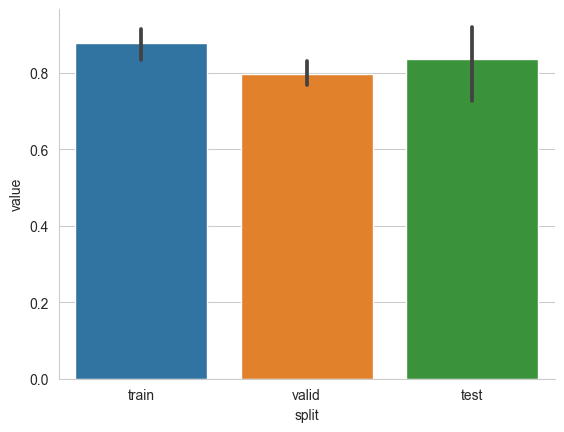

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

sns.barplot(log, x='split', y='value')
sns.despine()